# Assignment 5(due on 12/20)

## Student:梁纪元（12332296），Gtihub：Edc147258
## 批改人：张鹏


## 得分：38/40

# Assignment-05 Modeling of carbon cycle

In this problem, we will build a box model to understand the Earth’s carbon cycle based on the framework in Tomizuka 2009.

In [2]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from matplotlib.ticker import MaxNLocator
import math
from scipy.integrate import odeint
from math import e


/home/zhangp/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1.1 [15 points] Following equation 1-2 (without the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm (parts per million) from 1987 to 2004.

非线性拟合结果： [ 2.43953715e-02 -3.98729502e+01 -1.12317046e+02]


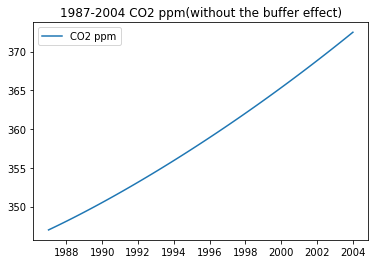

In [2]:
# 读取数据
df=pd.read_csv('global.1751_2008.ems.txt',sep='\s+',skiprows=27,
               names=['year','total','gas','liquids','cement solids','gas production','per flaring','capita'])
# 非线性拟合函数
def func_fit(t,r1,r2,r3):
    return np.exp(r1*t+r2)+r3
# 设置拟合函数初始值
r1=0.1
r2=0.1
r3=0
p0=[r1,r2,r3] 
# 参数拟合
para,cov=optimize.curve_fit(func_fit,df['year'],df['total'],p0=p0)
# 计算拟合结果
result_fit=[func_fit(a,*para) for a in df['year']] 
print('非线性拟合结果：',para)

# 建立不考虑缓冲效应的双箱模型，求解微分方程
def model1(y,t,k12,k21,para):   
    N1,N2,r = y
    dydt=[-k12*N1+k21*N2+r,k12*N1-k21*N2,para[0]*(r-para[2])]
    return dydt
# 参数设置
t=np.linspace(1987, 2004, 100)#independent variable
r=func_fit(t,*para)
k12=105/740
k21=102/900
N1=740*1000
N2=900*1000
y0=[N1,N2,r[0]]
# 用ode求解器求解，并根据论文转化为ppm下数值
sol = odeint(model1, y0, t, args=(k12,k21,para))/1000/740*347
plt.figure
plt.plot(t, sol[:, 0], label='CO2 ppm')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # Set the scale of the horizontal axis to an integer
plt.legend(loc='best')
plt.title('1987-2004 CO2 ppm(without the buffer effect)')
plt.savefig("fig1.png", dpi=500, bbox_inches='tight')
plt.show()

1.2 [20 points] Following equation 3-4 (with the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm from 1987 to 2004.

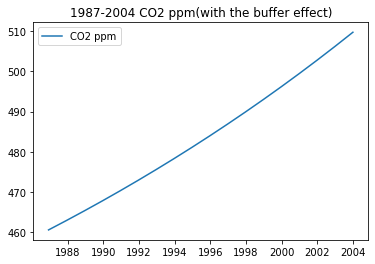

In [3]:
# 建立考虑缓冲效应的双箱模型，求解微分方程
def model2(y,t,k12,k21,N0,para):
    N1,N2,r2 = y
    #缓冲效应变量
    bf=3.69+1.86e-2*(N1/740/1000*347)-1.8e-6*((N1/740/1000*347)**2) 
    dydt=[-k12*N1+k21*(N0+bf*(N2-N0))+r2,
          k12*N1-k21*(N0+bf*(N2-N0)),
          para[0]*(r2-para[2])]
    return dydt
# 参数设置
t2=np.linspace(1751, 2004, 253) 
r2=func_fit(t2,*para)
k12=105/740
k21=102/900
N0=821*1000
N1=821*1000
N2=821*1000
y0=[N1,N2,r2[0]] 
# 用ode求解器求解，并根据论文转化为ppm单位下数值
sol2 = odeint(model2, y0, t2, args=(k12,k21,N0,para))/740/1000*347 
plt.figure
plt.plot(t2[235:253],sol2[235:253,0], label='CO2 ppm')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) 
plt.legend(loc='best')
plt.title('1987-2004 CO2 ppm(with the buffer effect)')
plt.savefig("fig2.png", dpi=500, bbox_inches='tight')
plt.show()

1.3 [5 points] Based on your results from 1.1 and 1.2, reproduce Figure 2 in Tomizuka (2009) as much as you can.

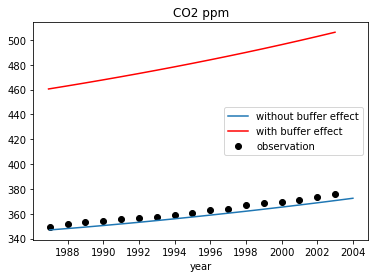

In [4]:
# 加载二氧化碳年平均排放量数据(实际观测值)
df2=pd.read_csv('co2_annmean_mlo.txt',delim_whitespace=True,skiprows=45,names=['year','mean','unc'])
plt.figure
plt.plot(t, sol[:, 0]) # 加载数据1
plt.plot(t2[235:252], sol2[235:252,0], 'r') # 加载数据2
plt.scatter(df2['year'][28:45],df2['mean'][28:45],color='k') # 加载观测数据
plt.legend(['without buffer effect','with buffer effect','observation'],loc='best')
plt.xlabel('year')
# x轴显示整数
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('CO2 ppm')
plt.savefig("fig3.png", dpi=500, bbox_inches='tight')
plt.show()


### 第一问代码思路和结果正确，但是gama值未添加1986年的值
### 第二问计算数值偏大可能公式哪里设置错误
### 第三问，由于第二问导致buffer曲线数值偏大。报告详细完整
### 得分37+1/40

In [4]:
#参考代码
# obtain the gama value, i.e., the CO2 emission data
gama = np.loadtxt("global.1751_2008.csv", delimiter=",", skiprows = 237)[0:-4,1]/10**3
# declare the vars
yearCount = 2004 - 1986 + 1
t = np.linspace(1986,2004,yearCount,dtype='int')
N1_eq_1_2 = np.empty_like(t)
N2_eq_1_2 = np.empty_like(t)
t

array([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004])

In [5]:
N1_eq_3_4 = np.empty_like(t)
N2_eq_3_4 = np.empty_like(t)

In [6]:
def compute_xi(CO2_ppm):
    xi = 3.69 + 1.86 * 10**-2 * CO2_ppm - 1.80 * 10**-6 * CO2_ppm**2
    return xi 

In [7]:
# ODE creation of eq.3 and eq.4
def eq_3_4(N,t,gama,xi):
    N02 = 821
    k12 = 105/740
    k21 = 102/900
    N1,N2 = N
    dN1dt = -k12 * N1 + k21 * (N02 + xi*(N2 - N02)) + gama
    dN2dt = k12 * N1 - k21 * (N02 + xi*(N2 - N02))
    return [dN1dt, dN2dt]

In [8]:
N0 = [740, 900]
N1_eq_3_4[0],N2_eq_3_4[0] = N0
CO2_ppm = N1_eq_3_4[0]/2.13
xi = compute_xi(CO2_ppm)
# slove the ODE year by year
for i in range(1,yearCount):
    #set the setp size
    dt = [0,1]    
    # numericly solve the eq.s
    N = odeint(eq_3_4,N0,dt,args=(gama[i-1],xi))
    # store the result
    N1_eq_3_4[i] = N[1][0]
    N2_eq_3_4[i] = N[1][1]
    # initiation of the next step
    CO2_ppm = N1_eq_3_4[i]/2.13
    N0 = N[1]
    xi = compute_xi(CO2_ppm)
    
N1_eq_3_4[0:]/2.13

array([347.41784038, 369.95305164, 378.87323944, 383.09859155,
       385.91549296, 388.73239437, 391.54929577, 393.89671362,
       396.71361502, 399.53051643, 402.34741784, 405.16431925,
       407.98122066, 410.79812207, 413.61502347, 416.43192488,
       419.24882629, 422.53521127, 425.35211268])